OpenFLUX

Collaborators: Pedro Coimbra, Benjamin Loubet, Pauline Buysse

Version: α

In [1]:
import os, re
if 'pod' not in globals(): pod = os.getcwd()
os.chdir(re.sub(r'\\Lib.*$', '', os.getcwd()))
pwd = os.getcwd()
print('path original directory: ', pod)
print('path working directory: ', pwd)


path original directory:  c:\Users\phherigcoimb\OneDrive\INRAe\thesis-project-1\gargantua\Lib\OpenFlux
path working directory:  c:\Users\phherigcoimb\OneDrive\INRAe\thesis-project-1\gargantua


In [2]:
import __gargantua__ as mm
import __scripts__.gargantua as gg
import __scripts__.common as gt
from Lib.OpenFlux import main as of
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


c:\Users\phherigcoimb\Anaconda3\envs\talltower\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\phherigcoimb\Anaconda3\envs\talltower\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\Users\phherigcoimb\Anaconda3\envs\talltower\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Monitoring Saclay

In [42]:
p = r"C:\Users\phherigcoimb\OneDrive\INRAe\thesis-project-1\open_flux\data\PAUL\PARIS-Sac\RAW_20Hz"
df = of.get_rawdata.open_flux(p, pd.date_range('20230614', '20230615', freq='30Min')).data
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP']).dt.floor('1Min')
df['TIMESTAMP30'] = pd.to_datetime(df['TIMESTAMP']).dt.floor('30Min')
df30 = df.groupby('TIMESTAMP30').agg(np.nanmean).reset_index(drop=False)
df = df.merge(df30[['TIMESTAMP30', 'aux 3 - w (m/s)', 'co2 dry(umol/mol)']], on='TIMESTAMP30', suffixes=(None, "_30"))
del df30


c:\Users\phherigcoimb\OneDrive\INRAe\thesis-project-1\gargantua\Lib\open_flux\scripts\get_rawdata.py:305: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_td = pd.read_csv(path_to_tdfile, **kw_csv)
c:\Users\phherigcoimb\OneDrive\INRAe\thesis-project-1\gargantua\Lib\open_flux\scripts\get_rawdata.py:305: RuntimeWarning: compression has no effect when passing a non-binary object as input.
  df_td = pd.read_csv(path_to_tdfile, **kw_csv)
c:\Users\phherigcoimb\OneDrive\INRAe\thesis-project-1\gargantua\Lib\open_flux\scripts\get_rawdata.py:305: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_td = pd.read_csv(p

In [43]:
df.columns

Index(['datah', 'seconds', 'nanoseconds', 'sequence number',
       'diagnostic value', 'diagnostic value 2', 'date', 'time',
       'co2 absorptance', 'h2o absorptance', 'co2 (mmol/m^3)', 'co2 (mg/m^3)',
       'h2o (mmol/m^3)', 'h2o (g/m^3)', 'block temperature (c)',
       'total pressure (kpa)', 'box pressure (kpa)', 'head pressure (kpa)',
       'aux 1 - u (m/s)', 'aux 2 - v (m/s)', 'aux 3 - w (m/s)',
       'aux 4 - ts (c)', 'cooler voltage (v)', 'chopper cooler voltage (v)',
       'vin smartflux (v)', 'co2 (umol/mol)', 'co2 dry(umol/mol)',
       'h2o (mmol/mol)', 'h2o dry(mmol/mol)', 'dew point (c)',
       'cell temperature (c)', 'temperature in (c)', 'temperature out (c)',
       'average signal strength', 'co2 signal strength', 'h2o signal strength',
       'delta signal strength', 'flow rate (slpm)', 'flow rate (lpm)',
       'flow pressure (kpa)', 'flow power (v)', 'flow drive (%)', 'h2o sample',
       'h2o reference', 'co2 sample', 'co2 reference', 'hit power (w)',
    

In [44]:
df["covwc"] = (df['aux 3 - w (m/s)'] - df['aux 3 - w (m/s)_30']) * \
    (df['co2 dry(umol/mol)'] - df['co2 dry(umol/mol)_30'])
df["covwc+"] = df["covwc"] * \
    ((df['aux 3 - w (m/s)'] - df['aux 3 - w (m/s)_30']) > 0)
df["covwc-"] = df["covwc"] * \
    ((df['aux 3 - w (m/s)'] - df['aux 3 - w (m/s)_30']) <= 0)


C:\Users\PHHERI~1\AppData\Local\Temp/ipykernel_2152/3645279334.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby("TIMESTAMP").agg(np.nanmean).reset_index(drop=False)


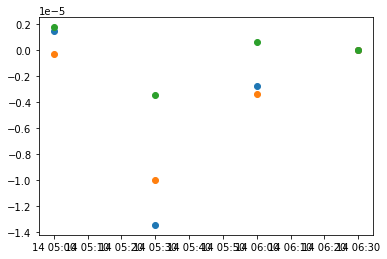

In [45]:
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP']).dt.floor('30Min')
df = df.groupby("TIMESTAMP").agg(np.nanmean).reset_index(drop=False)

plt.scatter(df['TIMESTAMP'], df['covwc'])
plt.scatter(df['TIMESTAMP'], df['covwc+'])
plt.scatter(df['TIMESTAMP'], df['covwc-'])


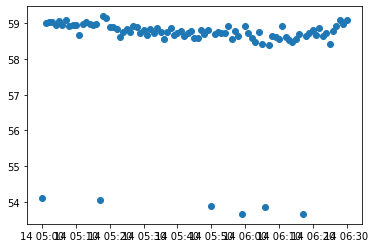

In [28]:
df = df.groupby("TIMESTAMP").agg(np.nanmean).reset_index(drop=False)
plt.scatter(df['TIMESTAMP'], df['flow drive (%)'])


Monitoring Boat

In [11]:
from functools import reduce
import gc

def boat(p_='EC_CI_LEG1_0', x1='w_rotated', x2='ch4', w=['w_rotated', 'w_sc', 'w_msc'],
          outf="C:/Users/phherigcoimb/OneDrive/LSCE/JD_bateau/Data_GHASS2(1)/output"):
    # GET DATA
    p = "C:/Users/phherigcoimb/OneDrive/LSCE/JD_bateau/Data_GHASS2(1)/Data_GHASS2"
    df = of.get_rawdata.open_flux(p, fkwargs={'file_pattern': p_}).data
    
    #GET MIN AVG
    df['TIMESTAMP'] = df['timestamp']
    df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])
    df['TIMESTAMP30'] = pd.to_datetime(df['TIMESTAMP']).dt.floor('30Min')
    df30 = df.groupby('TIMESTAMP30').agg(np.nanmean).reset_index(drop=False)
    df = df.merge(df30[['TIMESTAMP30', 'w', 'ch4']], on='TIMESTAMP30', suffixes=(None, "_30"))
    
    # RUN EC DWT
    Xs = []
    Xnas = []
    for X in [df[x1], df[x2]]:
        Xna = np.isnan(X)
        X = np.interp(np.linspace(0, 1, len(X)),
                    np.linspace(0, 1, len(X))[Xna == False],
                    X[Xna == False])
        Xnas += [Xna]
        Xs += [X]# - np.nanmean(X)]
        del X, Xna

    [Y1, Y2], level = of.mld.decompose(*Xs)
    YS = Y1 * Y2.conjugate()

    # RUN EC DWT
    Ws = []
    Wnas = []
    for X in [df[w_] for w_ in w]:
        Xna = np.isnan(X)
        X = np.interp(np.linspace(0, 1, len(X)),
                      np.linspace(0, 1, len(X))[Xna == False],
                      X[Xna == False])
        Wnas += [Xna]
        Ws += [X]  # - np.nanmean(X)]
        del X, Xna
    
    Ws = {w_: of.mld.decompose(Ws[i])[0][0] for i, w_ in enumerate(w)}

    # ARR TO DATAFRAME
    def __arr2dataframe__(Y, prefix='', id=np.array(df.TIMESTAMP)):
        __temp__ = of.wc.matrixtotimetable(id, np.array(Y), columns=[
                "{}_{}".format(prefix, l) for l in range(level)] + ["{}_r".format(prefix)])
        __temp__["qc_{}".format(prefix)] = (Xnas[0] | Xnas[1]) * 1
        return __temp__

    df_fullcospectra = reduce(lambda left, right: pd.merge(left, right[['TIMESTAMP'] + list(right.columns.difference(left.columns))], on="TIMESTAMP", how="outer"),
                        [__arr2dataframe__(Y, n) for n, Y in {'wch4': YS}.items()])
    df_w_fullspectra = reduce(lambda left, right: pd.merge(left, right[['TIMESTAMP'] + list(right.columns.difference(left.columns))], on="TIMESTAMP", how="outer"),
                        [__arr2dataframe__(Y, n) for n, Y in Ws.items()])
    
    # SAVE FIGURES
    for n, y in {f'{x1}': Y1, 
                 f'{x2}': Y2, 
                 f'{x1}{x2}': YS}.items():
        figprops = dict(figsize=(21, 8), dpi=72)
        fig = plt.figure(**figprops)
        fig_grid = plt.GridSpec(3,1, hspace=0, wspace=0.1)
        plt.title(n)

        plt.subplot(fig_grid[0, 0])
        plt.imshow(y[:-1], aspect='auto',
                vmin=np.quantile(y[:-1], 0.01),
                vmax=np.quantile(y[:-1], 0.99), origin='lower')

        plt.subplot(fig_grid[1, 0])
        y_ = np.sum(y[:15], axis=0)
        plt.plot(df.TIMESTAMP, y_)
        plt.ylim(np.quantile(y_, 0.001), np.quantile(y_, 0.999))
        plt.xlim(min(df.TIMESTAMP), max(df.TIMESTAMP))
        plt.savefig(os.path.join(outf, f'{p_}{n}.png'))
        plt.close()
    
    figprops = dict(figsize=(21, 8), dpi=72)
    fig = plt.figure(**figprops)
    fig_grid = plt.GridSpec(3, 1, hspace=0, wspace=0.1)

    plt.subplot(fig_grid[0, 0])
    plt.imshow(Ws[w[0]][:-1], aspect='auto',
                vmin=np.quantile(Ws[w[0]][:-1], 0.01),
               vmax=np.quantile(Ws[w[0]][:-1], 0.99), origin='lower')
    plt.ylabel(w[0])
    
    for i, w_ in enumerate(w[1:]):
        y_ = Ws[w_][:-1] - Ws[w[0]][:-1]
        plt.subplot(fig_grid[i+1, 0])
        plt.imshow(y_, aspect='auto',
                vmin=np.quantile(y_, 0.01),
                   vmax=np.quantile(y_, 0.99), origin='lower')
        plt.ylabel(str(w_) + "-" + str(w[0]))

    plt.savefig(os.path.join(outf, f'{p_}wind.png'))
    plt.close()

    # AVG 1 MIN
    df_fullcospectra["TIMESTAMP"] = pd.to_datetime(np.array(df_fullcospectra.TIMESTAMP)).ceil('1Min')
    df_fullcospectra = df_fullcospectra.groupby("TIMESTAMP").agg(np.nanmean).reset_index()
    df["TIMESTAMP"] = pd.to_datetime(np.array(df.TIMESTAMP)).ceil('1Min')
    df = df.groupby("TIMESTAMP").agg(np.nanmean).reset_index()

    #df_fullcospectra.to_csv(os.path.join(outf, p_ + '_fullspectra.csv'), index=False)
    #df.to_csv(os.path.join(outf, p_ + '.csv'), index=False)

    gc.collect()
    return


In [12]:
[boat(f) for f in [f'EC_CI_LEG1_{i}' for i in range(10)] + [f'EC_CI_LEG1_{i}' for i in range(5)]]


C:\Users\PHHERI~1\AppData\Local\Temp/ipykernel_18980/2746194474.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df30 = df.groupby('TIMESTAMP30').agg(np.nanmean).reset_index(drop=False)
C:\Users\PHHERI~1\AppData\Local\Temp/ipykernel_18980/2746194474.py:67: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(fig_grid[0, 0])
C:\Users\PHHERI~1\AppData\Local\Temp/ipykernel_18980/2746194474.py:105: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby("TIMESTAMP").agg(

KeyError: 'timestamp'

In [43]:
p = r"C:\Users\phherigcoimb\OneDrive\LSCE\JD_bateau\Data_GHASS2(1)\Data_GHASS2"
df = of.get_rawdata.open_flux(p, fkwargs={'file_pattern': '_EC_CI_LEG1_0.+'}).data


In [44]:
df['TIMESTAMP'] = df['timestamp']
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])
df['TIMESTAMP30'] = pd.to_datetime(df['TIMESTAMP']).dt.floor('30Min')
df30 = df.groupby('TIMESTAMP30').agg(np.nanmean).reset_index(drop=False)
df = df.merge(df30[['TIMESTAMP30', 'w', 'ch4']], on='TIMESTAMP30', suffixes=(None, "_30"))
del df30


C:\Users\PHHERI~1\AppData\Local\Temp/ipykernel_25024/417306321.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df30 = df.groupby('TIMESTAMP30').agg(np.nanmean).reset_index(drop=False)


In [51]:
Xs = []
Xnas = []
for X in [df.w, df.ch4]:
    Xna = np.isnan(X)
    X = np.interp(np.linspace(0, 1, len(X)),
                  np.linspace(0, 1, len(X))[Xna == False],
                  X[Xna == False])
    Xnas += [Xna]
    Xs += [X - np.nanmean(X)]
    del X, Xna

[Y1, Y2], level = of.mld.decompose(*Xs)
YS = Y1 * Y2.conjugate()

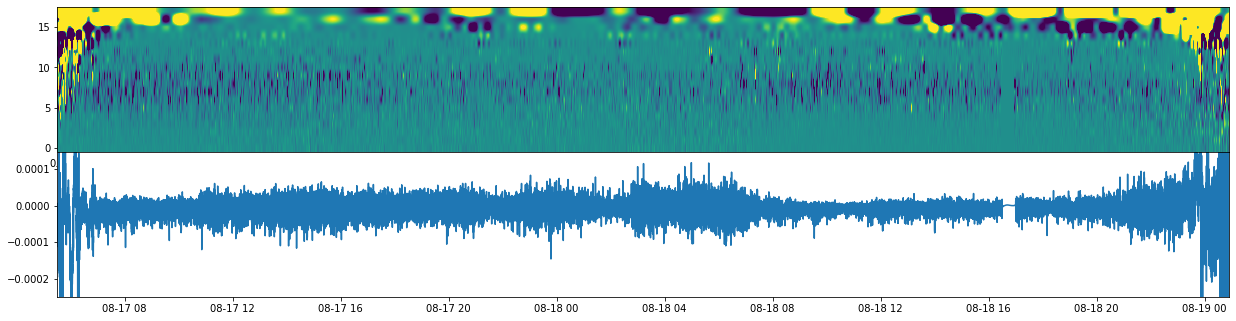

In [55]:
YS_ = np.sum(YS[:15], axis=0)

figprops = dict(figsize=(21, 8), dpi=72)
fig = plt.figure(**figprops)
fig_grid = plt.GridSpec(3,1, hspace=0, wspace=0.1)

plt.subplot(fig_grid[0, 0])
plt.imshow(YS[:-1], aspect='auto',
           vmin=np.quantile(YS[:-1], 0.05),
           vmax=np.quantile(YS[:-1], 0.95), origin='lower')


plt.subplot(fig_grid[1, 0])
plt.plot(df.TIMESTAMP, YS_)
plt.ylim(np.quantile(YS_, 0.001), np.quantile(YS_, 0.999))
plt.xlim(min(df.TIMESTAMP), max(df.TIMESTAMP))
plt.show()


In [58]:
from functools import reduce

def __arr2dataframe__(Y, prefix='', id=np.array(df.TIMESTAMP)):
    __temp__ = of.wc.matrixtotimetable(id, Y, columns=[
            "{}_{}".format(prefix, l) for l in range(level)] + ["{}_r".format(prefix)])
    __temp__["qc_{}".format(prefix)] = (Xnas[0] | Xnas[1]) * 1
    return __temp__

df_fullcospectra = reduce(lambda left, right: pd.merge(left, right[['TIMESTAMP'] + list(right.columns.difference(left.columns))], on="TIMESTAMP", how="outer"),
                    [__arr2dataframe__(Y, n) for n, Y in {'wch4': YS}.items()])

In [74]:
df_fullcospectra["TIMESTAMP"] = pd.to_datetime(np.array(df_fullcospectra.TIMESTAMP)).ceil('1Min')
df_fullcospectra = df_fullcospectra.groupby("TIMESTAMP").agg(np.nanmean).reset_index()
df["TIMESTAMP"] = pd.to_datetime(np.array(df.TIMESTAMP)).ceil('1Min')
df = df.groupby("TIMESTAMP").agg(np.nanmean).reset_index()


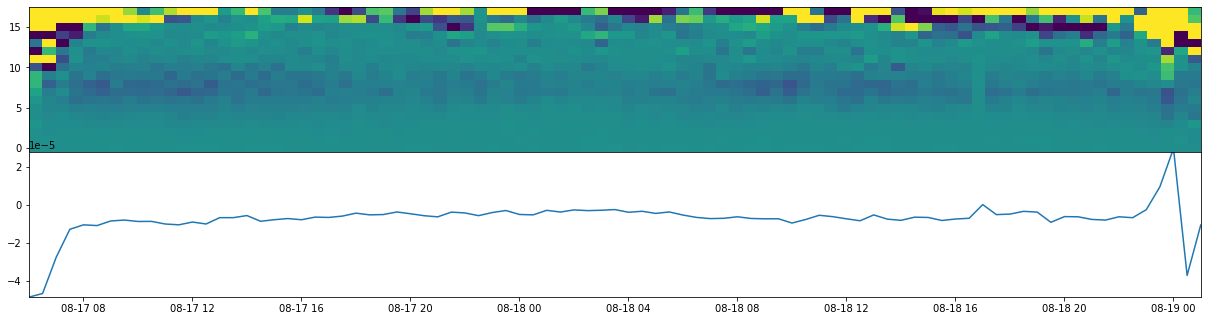

In [75]:
YS_ = np.array(df_fullcospectra[[c for c in df_fullcospectra.columns if c in [f'wch4_{i}' for i in np.arange(0, level, 1)] + ['wch4_r']]]).T

figprops = dict(figsize=(21, 8), dpi=72)
fig = plt.figure(**figprops)
fig_grid = plt.GridSpec(3, 1, hspace=0, wspace=0.1)

plt.subplot(fig_grid[0, 0])
plt.imshow(YS_[:-1], aspect='auto',
           vmin=np.quantile(YS[:-1], 0.05),
           vmax=np.quantile(YS[:-1], 0.95), origin='lower')

YS_ = np.sum(YS_[:15], axis=0)

plt.subplot(fig_grid[1, 0])
plt.plot(df.TIMESTAMP, YS_)
plt.ylim(np.quantile(YS_, 0.001), np.quantile(YS_, 0.999))
plt.xlim(min(df.TIMESTAMP), max(df.TIMESTAMP))
plt.show()


Run Interface

In [30]:
#from main import *
#import threading
#cfp = os.path.dirname(os.path.abspath('main.py'))


In [4]:
menu_ = gg.readable_file('Lib/open_flux/setup/readme_c.yaml').safe_load().to_dict()
#menu_ = gt.update_nested_dict(menu_, gg.readable_file('Lib/open_flux/setup/readme_PARIS-Jus.yaml').safe_load().to_dict())
menu = gg.referencedictionary(menu_, kinit=True)
_fcs = {}
for k in menu.keys():
    try:
        _fcs.update({k: gg.LazyCallable(gt.trygetfromdict(menu, [k, '__init__', 'path'], menu['__init__']['path']),
                                        gt.trygetfromdict(menu, [k, '__init__', 'function'], k), pkg=pwd).__get__().fc
                     })
    except Exception as e:
        print(str(e))
        None
menu = gg.referencedictionary(menu_, kinit=False)

menu['run_cwt']

'path'
'path'
'path'
'path'
'path'
'path'
'path'
'path'
'path'
'path'
'path'
'path'
'path'
'path'
'path'
'path'


{'method': 'torrencecompo',
 'nthreads': 1,
 'output_path': 'C:/Users/phherigcoimb/Desktop/INRAE_longfiles/PAUL/PARIS-Sac/output/CWT/mhat/FR-Sac_CWT{}_{}.{}mn.csv',
 'overwrite': False,
 'pathtoraw': 'C:/Users/phherigcoimb/Desktop/INRAE_longfiles/PAUL/PARIS-Sac/output/raw_datasets/level_9/',
 'varstorun': ['co2*w', 'h2o*w', 't_sonic*w'],
 'ymd': ['202306010030', '202306020000', '30min']}

In [3]:
from datetime import datetime, timedelta
δ = 2
byesterday = (datetime.today() - timedelta(δ))
yesterday = (datetime.today() - timedelta(1))
rangedays = (byesterday.strftime('%Y%m%d0000'), yesterday.strftime('%Y%m%d2359'))

ymd = [[min(l), max(l), '30Min'] for l in tt.list_time_in_period(
    rangedays[0], rangedays[-1], '30Min', '1D', include='both')]

In [4]:
print(rangedays, '\n', ymd)

('202306190000', '202306202359') 
 [[Timestamp('2023-06-19 00:00:00', freq='30T'), Timestamp('2023-06-20 00:00:00', freq='30T'), '30Min'], [Timestamp('2023-06-20 00:00:00', freq='30T'), Timestamp('2023-06-20 23:30:00', freq='30T'), '30Min']]


In [6]:
api(setup=menu_, block=[[['run_eddycovariance']]], __init__={'<TIME_BEGIN>': rangedays[0], '<TIME_END>': rangedays[1]}, __routine__={'ymd': ymd})

dict_keys(['run_eddycovariance'])
¤ run_eddycovariance

RUNNING EDDY COVARIANCE

['20230619' '20230620']
['C:/Users/phherigcoimb/Desktop/INRAE_longfiles/PAUL/PARIS-Jus/output/raw_datasets/level_9/PARIS-Jus_raw_dataset_202306200000.csv.gz', 'C:/Users/phherigcoimb/Desktop/INRAE_longfiles/PAUL/PARIS-Jus/output/raw_datasets/level_9/PARIS-Jus_raw_dataset_202306200030.csv.gz', 'C:/Users/phherigcoimb/Desktop/INRAE_longfiles/PAUL/PARIS-Jus/output/raw_datasets/level_9/PARIS-Jus_raw_dataset_202306200100.csv.gz', 'C:/Users/phherigcoimb/Desktop/INRAE_longfiles/PAUL/PARIS-Jus/output/raw_datasets/level_9/PARIS-Jus_raw_dataset_202306200130.csv.gz', 'C:/Users/phherigcoimb/Desktop/INRAE_longfiles/PAUL/PARIS-Jus/output/raw_datasets/level_9/PARIS-Jus_raw_dataset_202306200200.csv.gz', 'C:/Users/phherigcoimb/Desktop/INRAE_longfiles/PAUL/PARIS-Jus/output/raw_datasets/level_9/PARIS-Jus_raw_dataset_202306200230.csv.gz', 'C:/Users/phherigcoimb/Desktop/INRAE_longfiles/PAUL/PARIS-Jus/output/raw_datasets/level_9/

In [2]:
menu = tt.readable_file(r'C:\Users\phherigcoimb\OneDrive\INRAe\thesis-project-1\open_flux\setup\readme.yaml').safe_load().to_dict()
menu = tt.update_nested_dict(menu, tt.readable_file(r'C:\Users\phherigcoimb\OneDrive\INRAe\thesis-project-1\open_flux\setup\readme_PARIS-Rov.yaml').safe_load().to_dict())
menu = tt.referencedictionary(menu)
menu['run_preparation']['ymd'] = ['202305100000', '202305101059', '30min']

ymd = [list_of_dates(*menu['run_preparation']['ymd'])[1]]
print(ymd)
print(menu['run_preparation']['ymd'])
print(menu['run_preparation']['steps_order'])
menu['run_preparation']['first_step']['kwargs']

[Timestamp('2023-05-10 00:30:00', freq='30T')]
['202305100000', '202305101059', '30min']
['despike', 'tilt_axis', 'time_lag', 'changing units']


{'fmt': {'addkeep': ['t_cell', 'press_cell'],
  'cols': {'co2': 'co2_wet',
   'co2_dry': 'co2',
   'h2o': 'h2o_wet',
   'h2o_dry': 'h2o',
   't': 'ts'},
  'cut': False},
 'onlynumeric': True,
 'path': 'C:/Users/phherigcoimb/Desktop/INRAE_longfiles/PAUL/PARIS-Rov/input/EC/',
 'verbosity': True}

Setup

In [4]:
path = 'C:/Users/phherigcoimb/OneDrive/INRAe/thesis-project-1/gargantua/Lib/OpenFlux/setup/'
#menu = gg.readable_file('C:/Users/phherigcoimb/Desktop/INRAE_longfiles/PAUL/PARIS-Sac/openflux_setup.yaml').safe_load().to_dict()
#menu = gt.update_nested_dict(menu, gg.readable_file('C:/Users/phherigcoimb/Desktop/INRAE_longfiles/PAUL/PARIS-Sac/openflux_addon.yaml').safe_load().to_dict())
menu = gg.readable_file(path+'readme.yaml').safe_load().to_dict()
menu = gt.update_nested_dict(menu, gg.readable_file(path+'readme_PARIS-Rov.yaml').safe_load().to_dict())
menu = gt.update_nested_dict(menu, gg.readable_file(path+'addon_RunEddyPro.yaml').safe_load().to_dict())
menu = gg.referencedictionary(menu, kinit=True)


In [5]:
RunEddyPro = gg.LazyCallable(gt.trygetfromdict(menu, ['RunEddyPro', '__init__', 'path'], menu.get('__init__', {}).get('path', None)),
                                 gt.trygetfromdict(menu, ['RunEddyPro', '__init__', 'function'], 'RunEddyPro'))
RunEddyPro(**{k: v for k, v in menu['RunEddyPro'].items() if k not in ['__init__']})


CALL LOOP


KeyboardInterrupt: 

In [ ]:
pd.date_range(min(MR_data.TIMESTAMP.dt.floor('1s')), max(MR_data.TIMESTAMP.dt.ceil('1s')), freq='0.1S')

In [5]:
gt.metadata(compaign='PAUL').print()


__filepath__: None
compaign: PAUL


In [ ]:
proc_setup = gt.metadata(
    compaign=menu['__init__']['<PROJECT>'], 
    co_site=menu['__init__']['<SITE>'])
#proc_setup = tt.metadata(compaign='PAUL')
#proc_setup.site = tt.ECsite('Grig')
#proc_setup.co_site = "PARIS-Jus" #proc_setup.site.sitename
proc_setup.mother_folder = "C:/Users/phherigcoimb/Desktop/INRAE_longfiles/" + \
    proc_setup.compaign + "/" + proc_setup.co_site + "/"
proc_setup.raw_input_folder = proc_setup.mother_folder + 'input/EC/'


if proc_setup.compaign == 'COV3ER':
    proc_setup.time_range = ('201606010000', '201607312359', '5min')
elif proc_setup.compaign == 'PAUL':
    proc_setup.time_range = ('202301010000', '202312312359', '30min')
else:
    #proc_setup.time_range = ('202107010000', '202107020000', '30min')
    proc_setup.time_range = ('201901010000', '202212312359', '30min')



In [5]:
if 'time_list' not in proc_setup.vars().keys():
    proc_setup.time_list = list(pd.date_range(proc_setup.time_range[0], proc_setup.time_range[1], freq=proc_setup.time_range[2]))

#if 'site' not in proc_setup.vars().keys():
#    proc_setup.site = tt.ECsite(proc_setup.co_site)

print(proc_setup.co_site)

FR-Gri


## Pre processing

- LEVEL 1 → Unprocessed
- LEVEL 2 → Despiking: Vickers and Mahrt, 1997
- LEVEL 3 → Cross-wind: -
- LEVEL 4 → Angle-of-attack: -
- LEVEL 5 → Tilt: double rotation
- LEVEL 6 → Lag: covariance max. w/ default
- LEVEL 7 → Detrending: block average


In [ ]:
thread_prep = threading.Thread(target=run_preparation, kwargs=menu['RawCorrections'])
thread_prep.start()


In [3]:
menu['RawCorrections']['ymd'] = ['202305150000', '202306302359', '30min']

In [ ]:
RawCorrections = gg.LazyCallable(gt.trygetfromdict(menu, ['RawCorrections', '__init__', 'path'], menu.get('__init__', {}).get('path', None)),
                                 gt.trygetfromdict(menu, ['RawCorrections', '__init__', 'function'], 'RawCorrections'))
RawCorrections(**{k: v for k, v in menu['RawCorrections'].items() if k not in ['__init__']})


In [ ]:
# PRE DROP DATES ALREADY SAVED FOR RUNNING FASTER
prep_setup.loopvar = prep.not_ignored_files(prep_setup.time_list, prep_setup.raw_kwargs['path']+'RAW_20Hz', "15790_RAW_20Hz_{}.gz", dateformat='%Y-%m-%d-%H%M', found=True, verbosity=1)
prep_setup.loopvar = prep.not_ignored_files(prep_setup.loopvar, prep_setup.path_output, prep_setup.file_name, "level_6", verbosity=1)

In [ ]:
'''RUN'''
refresh()

#rawdta = prep.PPDataset.openinloop(1, **prep_setup.vars())
_ = tt.multiprocess_framework(prep.PPDataset.open, multiprocess=1, verbos=1, **prep_setup.vars()).data


### testing

In [ ]:
rawdta_d = {}

for l in ['level_5', 'level_6']:
    bm_datf = pd.DataFrame()
    print(l, end=' ')
        
    for d, ps in tt.get_files_paths_using_regex(prep_setup.path_output + l + '/', prep_setup.time_list, pattern='.*_raw_dataset_([0-9]*).*').items():
        for p in ps:
            bm_datf = bm_datf.append(pd.read_csv(p))
        
    rawdta_d[l] = bm_datf        
    del bm_datf


In [ ]:
figprops = dict(figsize=(30, 12), dpi=72)
fig = plt.figure(**figprops)
fig_grid = plt.GridSpec(3,1)

for i, x in enumerate(['w', 'co2']):
    plt.subplot(fig_grid[i, 0])
    plt.title(x)
    for j, (k, v) in enumerate(rawdta_d.items()):
        plt.plot(v.reset_index(drop=True)[x], label=k, zorder=-j)
        plt.legend()
    plt.gca().twinx().plot((rawdta_d['level_6'][x]-rawdta_d['level_5'][x]).reset_index(drop=True), 'gray', alpha=0.6)


In [ ]:
figprops = dict(figsize=(30, 12), dpi=72)
fig = plt.figure(**figprops)
fig_grid = plt.GridSpec(3,1)

d = pd.date_range(min(rawdta_d['level_5'].TIMESTAMP), max(rawdta_d['level_5'].TIMESTAMP), freq='30Min')
plt.subplot(fig_grid[0, 0])

for j, (k, v) in enumerate(rawdta_d.items()):
    plt.title(k)
    
    v.loc[:, 'TIMESTAMP'] = pd.to_datetime(v.TIMESTAMP)
    #plt.plot(np.cov(np.array(v.w).reshape(20*60*30), np.array(v.co2).reshape(20*60*30), axis=0), label=k)
    plt.plot([np.cov(v.w[(v.TIMESTAMP >= d[t]) & (v.TIMESTAMP < d[t+1])], 
    v.co2[(v.TIMESTAMP >= d[t]) & (v.TIMESTAMP < d[t+1])])[0][1] for t in range(len(d)-1)], 
    label=k)
    plt.legend()


In [ ]:
of_.columns

In [ ]:
ep_lst = tt.get_files_paths_using_regex(proc_setup.mother_folder + "output/doublerotation/eddypro_raw_datasets/level_6/", 
[t.strftime('%Y%m%d-%H%M') for t in proc_setup.time_list], pattern='([0-9]{8}-[0-9]{4})_raw_dataset_.*.txt', date_format= '%Y%m%d-%H%M')

of_lst = tt.get_files_paths_using_regex(proc_setup.mother_folder + "output/raw_datasets/level_6_good_units/", 
[t.strftime('%Y%m%d%H%M') for t in proc_setup.time_list])

figprops = dict(figsize=(20, 12), dpi=72)
fig = plt.figure(**figprops)
fig_grid = plt.GridSpec(3, 1)

n = 0
for i, d in enumerate(ep_lst.keys()):# & op_lst.keys():
    if d != "20210101-1230": #i != 1:
        continue
    if n > 0:
        break
    print(d)#, end='\r')
    
    ep_ = pd.read_csv(ep_lst[d][0], **{'sep': '\s+', 'skiprows': 8, 'na_values': [-9999]})
    of_ = pd.read_csv(of_lst["20210101-1200".replace('-', '')][0])

    plt.subplot(fig_grid[0, 0])
    #plt.plot(ep_.co2-of_.co2/10**3, label=d)
    plt.plot(ep_.co2[:20], label=d)
    plt.plot(of_.co2[:20], label=d)
    plt.plot(of_.co2_conc[:20], label=d)
    #plt.plot(of_.co2_bfr_cvt/23.3, label=d)
    #plt.plot(ep_.co2-of_.co2_bfr_cvt/10**3, label=d)
    #plt.plot(of_.co2-of_.co2_bfr_cvt/10**3, label=d)
    plt.legend() 
    
    plt.subplot(fig_grid[1, 0])
    # plt.plot(ep_.w, label=d, c='gray')
    plt.plot(ep_.w-of_.w, label=d)
    plt.legend() 
    
    plt.subplot(fig_grid[2, 0])
    plt.scatter(of_.co2, ep_.co2)

    print(np.cov(ep_.w, ep_.co2))
    print(np.cov(of_.w, of_.co2))
    n += 1


## Processing

### Get BM

In [ ]:
bioclim_setup = tt.metadata()
bioclim_setup.rawfls_path = proc_setup.mother_folder + 'input/BM/'
bioclim_setup.output_path = proc_setup.mother_folder + 'output/BM/'

thread_bioclimatology = threading.Thread(
    target=run_bioclimatology, 
    kwargs={'ymd': [2020], #]np.unique([d.year for d in bioclim_setup.time_list]),
                   'rawfls_path':bioclim_setup.rawfls_path,
                   'output_path':bioclim_setup.output_path +
                   proc_setup.co_site + "_BM_{}.csv"}
                   )

In [4]:
run_bioclimatology(**menu['run_bioclimatology'])



RUNNING BIOCLIMATOLOGY

bm_avg <PyCall.jlwrap biomet_average>


<PyCall.jlwrap biomet_average>

In [4]:
class StoppableThread(threading.Thread):
    """Thread class with a stop() method. The thread itself has to check
    regularly for the stopped() condition."""

    def __init__(self,  *args, **kwargs):
        super(StoppableThread, self).__init__(*args, **kwargs)
        self._stop_event = threading.Event()

    def stop(self):
        self._stop_event.set()

    def stopped(self):
        return self._stop_event.is_set()


In [8]:
thread_bioclimatology = StoppableThread(
    target=run_bioclimatology,
    kwargs=menu['run_bioclimatology']
)


In [9]:
thread_bioclimatology.start()


RUNNING BIOCLIMATOLOGY


Exception in thread Thread-10:
Traceback (most recent call last):
  File "c:\Users\phherigcoimb\Anaconda3\envs\talltower\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "c:\Users\phherigcoimb\Anaconda3\envs\talltower\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\phherigcoimb\OneDrive\INRAe\thesis-project-1\open_flux\OpenFlux_central.py", line 151, in run_bioclimatology
    bm_avg = tt.LazyCallable("scripts/avg_fast.jl",
  File "c:\Users\phherigcoimb\OneDrive\INRAe\thesis-project-1\open_flux\scripts\import_all\gargantula\LazyCallable.py", line 81, in __get__
    self.fc = self.__get_jl__(*a, **k)
  File "c:\Users\phherigcoimb\OneDrive\INRAe\thesis-project-1\open_flux\scripts\import_all\gargantula\LazyCallable.py", line 17, in __get_jl__
    fc = jl.eval('include("{}"); {}'.format(self.modn, self.n))
  File "c:\Users\phherigcoimb\Anaconda3\envs\talltower\lib\site-packages\julia\core.py", line 627, in eval
    ans

In [7]:
thread_bioclimatology.stop()

### Get EC

In [ ]:
thread_ec = threading.Thread(
    target=run_eddycovariance, kwargs=menu['run_eddycovariance'])
thread_ec.start()


In [3]:
menu['run_eddycovariance']['ymd'] = ['202305220000', '202305252359', '30min']

In [4]:
run_eddycovariance(**menu['run_eddycovariance'])



RUNNING EDDY COVARIANCE

20230523 [47, 47] 25 %
20230523 [47, 47] 25 %


In [ ]:
consolidate_eddycovariance(ymd=np.arange(2016, 2024), 
                           path=eddycov_setup.output_path, 
                           pattern=eddycov_setup.prefix.format(p, '([0-9]{8})', '30'), 
                           output_path=eddycov_setup.output_path.rsplit('/', 2)[0] + '/' + eddycov_setup.prefix.format(p, str(y), '30'))


#### testing

In [ ]:
ec_data = reduce(lambda left, right: left.append(right), 
[pd.read_csv(eddycov_setup.mother_folder + 'output/EC/'+eddycov_setup.prefix.format('2r', *f, '30')) for f in [[y] for y in [2016]]])
ec_data['TIMESTAMP'] = pd.to_datetime(ec_data.TIMESTAMP)

figprops = dict(figsize=(20, 4), dpi=72)
fig = plt.figure(**figprops)
fig_grid = plt.GridSpec(1,1)

plt.subplot(fig_grid[0, 0])
plt.plot(tt.minmax(ec_data.TIMESTAMP), [0, 0], 'gray')
plt.plot(ec_data.TIMESTAMP, -ec_data.cov_wco2, 'k')
#plt.plot(ec_data.TIMESTAMP, -ec_data.cov_wts, 'red')
plt.plot(ec_data.TIMESTAMP, ec_data.cov_wh2o*10, 'blue')
plt.xlim(tt.minmax(ec_data.TIMESTAMP))


2 sites

In [ ]:
jus = [pd.read_csv(r'C:\Users\phherigcoimb\Desktop\INRAE_longfiles\PAUL\PARIS-Jus\output\EC' + '/PARIS-Jus_EC_{}.30mn.csv'.format(*f)) for f in [[y] for y in [2023]]]
for w in jus:
    w['TIMESTAMP'] = pd.to_datetime(w.TIMESTAMP) + pd.Timedelta('60min')
    del w

rom = [pd.read_csv(r'C:\Users\phherigcoimb\Desktop\INRAE_longfiles\PAUL\PARIS-Rom\output\EC' + '/PARIS-Rom_EC_{}.30mn.csv'.format(*f)) for f in [[y] for y in [2023]]]
for w in rom:
    w['TIMESTAMP'] = pd.to_datetime(w.TIMESTAMP) + pd.Timedelta('60min')
    del w

fluxResult = reduce(lambda left, right: pd.merge(left, right, on=['TIMESTAMP'],
                                                 how='outer', suffixes=['', '_rom']),
                    (*jus, *rom)).sort_values('TIMESTAMP').reset_index(drop=True)

    
figprops = dict(figsize=(21, 8), dpi=72)
fig = plt.figure(**figprops)
fig_grid = plt.GridSpec(2, 5)

plt.subplot(fig_grid[0, :])
plt.plot(fluxResult.TIMESTAMP, fluxResult.cov_wco2*10**3, 'k')
plt.ylim(-50, 50)
plt.xlim(*tt.minmax(fluxResult.TIMESTAMP))

plt.subplot(fig_grid[1, :])
plt.plot(fluxResult.TIMESTAMP, fluxResult.cov_wco2_rom*10**3, 'k')
plt.ylim(-50, 50)
plt.xlim(*tt.minmax(fluxResult.TIMESTAMP))
#plt.xlim(pd.to_datetime('20230316'), pd.to_datetime('20230317'))

5 x 30 minutes

C:\Users\PHHERI~1\AppData\Local\Temp/ipykernel_2732/2174794637.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ec_data = [reduce(lambda left, right: left.append(right),
C:\Users\PHHERI~1\AppData\Local\Temp/ipykernel_2732/2174794637.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ec_data = [reduce(lambda left, right: left.append(right),
C:\Users\PHHERI~1\AppData\Local\Temp/ipykernel_2732/2174794637.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ec_data = [reduce(lambda left, right: left.append(right),
C:\Users\PHHERI~1\AppData\Local\Temp/ipykernel_2732/2174794637.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ec_data = 

(-0.1, 0.1)

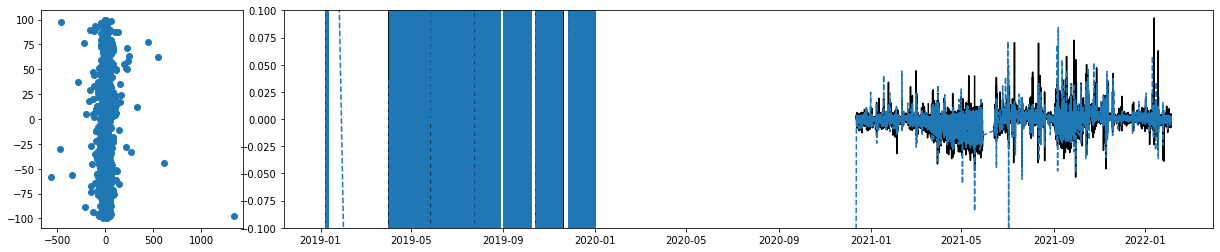

In [22]:
filepath = proc_setup.mother_folder + 'output/EC/'+proc_setup.co_site+'_EC_{}.{}mn.csv'
filepath = './data/ICOS/FR-Gri/doublerotation/EC/'+proc_setup.co_site+'_EC_{}.{}mn.csv'

ec_data = [reduce(lambda left, right: left.append(right),
                  [pd.read_csv(filepath.format(*f, str(a).zfill(2))) for f in [[y] for y in range(2019, 2023)]]) for a in [5, 30]]
for w in ec_data:
    w['TIMESTAMP'] = pd.to_datetime(w.TIMESTAMP) + pd.Timedelta('60min')
    del w

fluxResult = reduce(lambda left, right: pd.merge(left, right, on=['TIMESTAMP'],
                                                 how='outer', suffixes=['_5', '']),
                    ec_data).sort_values('TIMESTAMP').reset_index(drop=True)

fluxResult.loc[abs(fluxResult.cov_wco2) > 100, "cov_wco2"] = np.nan


figprops = dict(figsize=(21, 4), dpi=72)
fig = plt.figure(**figprops)
fig_grid = plt.GridSpec(1, 5)

plt.subplot(fig_grid[0, 0])
plt.scatter(fluxResult.cov_wco2_5, fluxResult.cov_wco2)

plt.subplot(fig_grid[0, 1:])
plt.plot(fluxResult.TIMESTAMP, fluxResult.cov_wco2_5, 'k')
plt.plot(fluxResult.TIMESTAMP[np.isnan(fluxResult.cov_wco2)==False], 
         fluxResult.cov_wco2[np.isnan(fluxResult.cov_wco2) == False], '--')
#plt.plot(fluxResult.cov_wco2_y*10**3, 'r--')
plt.ylim(-10**-1, 10**-1)


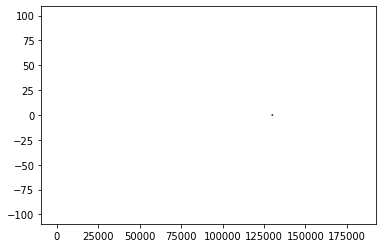

In [16]:
plt.plot(fluxResult.cov_wco2, 'k')

year

In [ ]:
ec_data = [reduce(lambda left, right: left.append(right), 
[pd.read_csv(proc_setup.mother_folder + 'output/EC/'+proc_setup.co_site+'_ECof_{}.30mn.csv'.format(*f)) for f in [[y] for y in [2020, 2021]]])]
for w in ec_data:
    w['TIMESTAMP'] = pd.to_datetime(w.TIMESTAMP) + pd.Timedelta('60min')
    del w

"""
ec_daty = [reduce(lambda left, right: left.append(right), 
[pd.read_csv(eddycov_setup.mother_folder + 'output/EC/doublerotation/b'+eddycov_setup.co_site+'_aEC_{}.30mn.csv'.format(*f)) for f in [[y] for y in [20200701]]])]
for w in ec_daty:
    w['TIMESTAMP'] = pd.to_datetime(w.TIMESTAMP)
    del w
"""

ep_data = [get_data.icos(path=proc_setup.mother_folder + "output/doublerotation/").filter(
    #{'TIMESTAMP': (min(post_setup.time_list), max(post_setup.time_list) + pd.Timedelta('1D'))}
    {'TIMESTAMP': (pd.to_datetime('20190101'), pd.to_datetime('20211231'))}
    ).modify({'h': 1000}).data[['TIMESTAMP', 'co2_flux', 'qc_co2_flux', 'Rg', 'PPFD', 'air_temperature', 'rand_err_co2_flux', 'VPD', 'RH', 'LE', 'H']]]

fluxResult = reduce(lambda left, right: pd.merge(left, right, on=['TIMESTAMP'],
                                                 how='inner'),
                    (*ep_data,
                     *ec_data,
                     #*ec_daty
                     )).sort_values('TIMESTAMP').reset_index(drop=True)

fluxResult.loc[abs(fluxResult.cov_wco2)>100, "cov_wco2"] = np.nan


figprops = dict(figsize=(21, 4), dpi=72)
fig = plt.figure(**figprops)
fig_grid = plt.GridSpec(1, 5)

plt.subplot(fig_grid[0, 0])
plt.scatter(fluxResult.co2_flux, fluxResult.cov_wco2*10**3)

plt.subplot(fig_grid[0, 1:])
plt.plot(fluxResult.co2_flux, 'k')
plt.plot(fluxResult.cov_wco2*10**3, '--')
#plt.plot(fluxResult.cov_wco2_y*10**3, 'r--')

In [ ]:
reduce(lambda left, right: left.append(right), 
[pd.read_csv(eddycov_setup.mother_folder + 'output/EC/doublerotation/b'+post_setup.co_site+'_EC_{}.30mn.csv'.format(*f)) for f in [[y] for y in [2020]]])

### Get DWT

In [25]:
menu['run_dwt'].update({'ymd': ['202101010030', '202212310000', '30min']})
menu['run_dwt']


{'averaging': [30, 5],
 'output_path': 'C:/Users/phherigcoimb/Desktop/INRAE_longfiles/ICOS/FR-Gri/output/DWT/DB6/FR-Gri_DWT{}_{}.{}mn.csv',
 'raw_kwargs': {'file_pattern': '.*_raw_dataset_([0-9]*).csv',
  'mother_path': 'C:/Users/phherigcoimb/Desktop/INRAE_longfiles/ICOS/FR-Gri/output/raw_datasets/level_6_good_units/'},
 'varstorun': ['co2*w', 'h2o*w', 't_sonic*w'],
 'ymd': ['202101010030', '202212310000', '30min'],
 '__init__': {'name': 'Multilevel Decomposition'}}

In [ ]:
run_dwt(**menu['run_dwt'])


### Get CWT

In [7]:
menu['run_cwt']['ymd'] = ['202206020130', '202206020230', '30min']
menu['run_cwt']['pathtoraw'] = 'C:/Users/phherigcoimb/Desktop/INRAE_longfiles/ICOS/FR-Gri/output/EP/eddypro_raw_datasets/level_6/'
menu['run_cwt']['output_path'] = 'C:/Users/phherigcoimb/Desktop/INRAE_longfiles/ICOS/FR-Gri/output/CWT/FR-Gri_CWT{}_{}.{}mn.csv'
menu['run_cwt']['varstorun'] = ['co2*w', 'h2o*w', 'ts*w']
menu['run_cwt']

{'method': 'torrencecompo',
 'nthreads': 1,
 'output_path': 'C:/Users/phherigcoimb/Desktop/INRAE_longfiles/ICOS/FR-Gri/output/CWT/FR-Gri_CWT{}_{}.{}mn.csv',
 'overwrite': False,
 'pathtoraw': 'C:/Users/phherigcoimb/Desktop/INRAE_longfiles/ICOS/FR-Gri/output/EP/eddypro_raw_datasets/level_6/',
 'varstorun': ['co2*w', 'h2o*w', 'ts*w'],
 'ymd': ['202206020130', '202206020230', '30min']}

In [8]:
run_cwt(**menu['run_cwt'])


RUNNING CWT (torrencecompo)

20220602
20220602 0 % 1


#### testing

In [ ]:
fluxResult = pd.read_csv(post_setup.mother_folder + post_setup.co_site + "_full_output_flagged.30mn.csv")

#fluxResult = pd.read_csv(r"C:/Users/phherigcoimb/Desktop/INRAE_longfiles/PAUL/PARIS-Jus/output/PARIS-Jus_full_output_flagged.30mn.csv")
#fluxResult = pd.read_csv(r"C:/Users/phherigcoimb/Desktop/INRAE_longfiles/PAUL/PARIS-Rov/output/PARIS-Rov_full_output_flagged.30mn.csv")
#fluxResult = pd.read_csv(r"C:\Users\phherigcoimb\OneDrive\INRAe\thesis-project-1\open_flux\data\ICOS\FR-Fon\doublerotation/FR-Fon_full_output_flagged.30mn.csv")

fluxResult.TIMESTAMP = pd.to_datetime(fluxResult.TIMESTAMP)
fluxResult.TIMEDELTA = fluxResult.TIMESTAMP.values.astype(float)

In [ ]:
figprops = dict(figsize=(20, 12), dpi=72)
fig = plt.figure(**figprops)
fig_grid = plt.GridSpec(4,1)

col_to_check_wv = 'co2*w'

plt.subplot(fig_grid[0, 0])
#plt.scatter(fluxResult.TIMESTAMP[(np.mod(fluxResult.wd+110, 360) > 220)*(np.mod(fluxResult.wd+110, 360) < 260)],
#            [-2]*len(fluxResult[(np.mod(fluxResult.wd+110, 360) > 220)*(np.mod(fluxResult.wd+110, 360) < 260)]), s=2, c='green')
plt.plot(tt.minmax(fluxResult.TIMESTAMP), [0, 0], c='gray')
plt.plot(fluxResult.TIMESTAMP, fluxResult['co2*w']*10**3, c='k')
plt.plot(fluxResult.TIMESTAMP, fluxResult['co2_flux'], c='red')
plt.plot(fluxResult.TIMESTAMP, fluxResult['cov_wco2']*10**3, c='blue')
#plt.plot(fluxResult.TIMESTAMP, fluxResult['h2o*w']*100, c='blue')
#plt.plot(fluxResult.TIMESTAMP, fluxResult.ch4_w, c='red')
plt.xlim(tt.minmax(fluxResult.TIMESTAMP))
#plt.ylim(-10, 10)

plt.subplot(fig_grid[2, 0])
freq_opts = set([re.findall('(.+)_freq_[0-9\.]*', p)[0] for p in fluxResult.columns if re.findall('(.+)_freq_[0-9\.]*', p)])
freq_opts = {f: [c for c in fluxResult.columns if c.startswith(f + "_freq")] for f in freq_opts}
freq_cols = freq_opts[col_to_check_wv]
freq_nums = [float(re.findall('_freq_([0-9\.]*)', c)[0]) for c in freq_cols]

plt.imshow(np.array(fluxResult[freq_cols]).T,
           aspect='auto',
           origin='lower',
        cmap='RdYlGn_r',
        norm=matplotlib.colors.TwoSlopeNorm(vmin=-0.001, vcenter=0, vmax=0.001),
        extent=(*tt.minmax(fluxResult.TIMEDELTA), *np.log2(tt.minmax(freq_nums))))
plt.yticks([np.log2(i/2*60*60) for i in [1/6, 1, 2, 4, 8, 12, 24]], ['5 mn', '30 mn'] + ['{} hr'.format(h//2) for h in [2, 4, 8, 12, 24]])
plt.xticks(*list(zip(*[(k, pd.to_datetime(k, errors='ignore')) for k in np.linspace(*tt.minmax(fluxResult.TIMEDELTA), 5)])))
#plt.xticks([2, 8, 14, 20], ['02:00', '08:00', '14:00', '20:00'])
plt.ylim(np.log2(2*60))
#plt.colorbar(label="CH4")

plt.subplot(fig_grid[1, 0])
plt.scatter(fluxResult.wd, fluxResult[col_to_check_wv], c='blue')
#plt.scatter(np.mod(fluxResult.wd+110, 360), fluxResult[freq_cols[1]], c='blue')


plt.subplot(fig_grid[3, 0])
plt.plot(tt.minmax(np.log2(freq_nums)), [0, 0], c='gray')
plt.plot(np.log2(freq_nums), np.sum(fluxResult[freq_opts['t_sonic*w']], axis=0), '--k')
plt.twinx().plot(np.log2(freq_nums), np.sum(fluxResult[freq_cols], axis=0))
plt.xticks([np.log2(i/2*60*60) for i in [1/6, 1, 2, 4, 8, 12, 24]], ['5 mn', '30 mn'] + ['{} hr'.format(h//2) for h in [2, 4, 8, 12, 24]])
plt.xlim(*tt.minmax(np.log2(freq_nums)))
plt.show()

In [ ]:
col_to_check_wv = 'ch4_w'
freq_cols = [c for c in fluxResult.columns if c.startswith(col_to_check_wv + "_freq")]
freq_nums = [float(re.findall(col_to_check_wv + '_freq_([0-9\.]*)', c)[0]) for c in freq_cols]

figprops = dict(figsize=(20, 10), dpi=72)
fig = plt.figure(**figprops)
fig_grid = plt.GridSpec(1+len(freq_cols)//8,8)

for i, f in enumerate(freq_cols):
    plt.subplot(fig_grid[i//8, i%8])
    plt.title(freq_nums[i]//60)
    plt.scatter(np.mod(fluxResult.wd_y+110, 360), fluxResult[f], c='blue')

## Unify all

In [3]:
menu['run_postprocessing']['output_path'] = menu['run_postprocessing']['output_path'].format("")
menu['run_postprocessing']['ymd'] = [2021]
menu['run_postprocessing']

{'output_path': 'C:/Users/phherigcoimb/Desktop/INRAE_longfiles/ICOS/FR-Gri/output/FR-Gri_full_output.30mn.csv',
 'path': 'C:/Users/phherigcoimb/Desktop/INRAE_longfiles/ICOS/FR-Gri/output/',
 'prefix': 'FR-Gri',
 'ymd': [2021]}

In [4]:
menu['unify_dataset'].update({
     'output_path': 'C:/Users/phherigcoimb/Desktop/INRAE_longfiles/ICOS/FR-Fon/output/FR-Fon_full_output.30mn.csv',
 'path': 'C:/Users/phherigcoimb/Desktop/INRAE_longfiles/ICOS/FR-Fon/output/',
 'prefix': 'FR-Fon',
 'ymd': [2019,2020,2021, 2022]
})
menu['unify_dataset']

{'include': {'BM': ['BM', ''],
  'CDWT': ['CDWT', 'dwt_'],
  'CWT': ['CWT', 'cwt_'],
  'EC': ['EC', ''],
  'ECunc': ['EC', '']},
 'output_path': 'C:/Users/phherigcoimb/Desktop/INRAE_longfiles/ICOS/FR-Fon/output/FR-Fon_full_output.30mn.csv',
 'path': 'C:/Users/phherigcoimb/Desktop/INRAE_longfiles/ICOS/FR-Fon/output/',
 'prefix': 'FR-Fon',
 'ymd': [2019, 2020, 2021, 2022]}

In [ ]:
_ = of.unify_dataset(**menu['unify_dataset'])

In [7]:
post_setup = tt.metadata(**proc_setup.vars())
post_setup.mother_folder = os.path.join('./wavelets_for_flux/data/', post_setup.compaign, post_setup.co_site, 'output/')
post_setup.mother_folder = os.path.join('./data/', post_setup.compaign, post_setup.co_site) #, 'doublerotation/'
#post_setup.mother_folder = os.path.join(f'C:/Users/phherigcoimb/Desktop/INRAE_longfiles/{post_setup.compaign}/{post_setup.co_site}/', 'output/')
post_setup.site = tt.ECsite('Grig', stpath="../data/info/stations.xlsx", lupath="../data/info/landuse.xlsx")


In [8]:
(post_setup.site.longitude, post_setup.site.latitude)

(1.95191, 48.84422)

In [7]:
if post_setup.co_site == post_setup.site.sitename:
    print(post_setup.co_site)
else:
    post_setup.print()
    print('---')
    post_setup.site.print()

FR-Gri


In [7]:
"""MERGE DATASETS"""

_years_ = [2020, 2021, 2022, 2023]

if os.path.exists(post_setup.mother_folder + "WV/" and len(os.listdir(post_setup.mother_folder + "WV/"))):
    wv_data = [reduce(lambda left, right: left.append(right), 
    [pd.read_csv(post_setup.mother_folder + 'WV/{}_WV_{}.30mn.csv'.format(post_setup.co_site, f[1])) \
        if os.path.exists(post_setup.mother_folder + 'WV/{}_WV_{}.30mn.csv'.format(post_setup.co_site, f[1])) else pd.DataFrame()
        for f in [[w, y] for y in _years_]])
                for w in ['MexicanHat2r']]
    wv_data = [w for w in wv_data if w.empty==False]
    for w in wv_data:
        w['TIMESTAMP'] = pd.to_datetime(w.TIMESTAMP)
        del w
else:
    wv_data = []
    
if os.path.exists(post_setup.mother_folder + "EC/") and len(os.listdir(post_setup.mother_folder + "EC/")):
    ec_data = [reduce(lambda left, right: left.append(right), 
    [pd.read_csv(post_setup.mother_folder + 'EC/'+post_setup.co_site+'_EC_{}.30mn.csv'.format(*f)) \
        if os.path.exists(post_setup.mother_folder + 'EC/'+post_setup.co_site+'_EC_{}.30mn.csv'.format(*f)) else pd.DataFrame()
        for f in [[y] for y in _years_]])]
    ec_data = [w for w in ec_data if w.empty==False]
    for w in ec_data:
        w['TIMESTAMP'] = pd.to_datetime(w.TIMESTAMP)
        del w
else:
    ec_data = []

if os.path.exists(post_setup.mother_folder + "BM/") and len(os.listdir(post_setup.mother_folder + "EC/")):
    bm_data = [reduce(lambda left, right: left.append(right), 
    [pd.read_csv(post_setup.mother_folder + 'BM/'+post_setup.co_site+'_BM_{}.30mn.avg.csv'.format(*f)) \
        if os.path.exists(post_setup.mother_folder + 'BM/'+post_setup.co_site+'_BM_{}.30mn.avg.csv'.format(*f)) else pd.DataFrame()
        for f in [[y] for y in _years_]])]
    #bm_data = [w for w in bm_data if w.empty == False]
    bm_data = [e[[c for c in ['TIMESTAMP', 'SW_IN', "NETRAD", 'PPFD_IN', "TA", "RH",
                              "WD"] if c in e.columns]] for e in bm_data]
    for w in bm_data:
        w['TIMESTAMP'] = pd.to_datetime(w.TIMESTAMP)
        del w
else:
    bm_data = []

if os.path.exists(post_setup.mother_folder + "EP/") and len(os.listdir(post_setup.mother_folder + "EP/")):
    ep_data = [get_data.icos(path=post_setup.mother_folder + "EP/").filter(
        #{'TIMESTAMP': (min(post_setup.time_list), max(post_setup.time_list) + pd.Timedelta('1D'))}
        {'TIMESTAMP': (pd.to_datetime('20190101'), pd.to_datetime('20301231'))}
    ).modify({'h': 1000}).data]
    ep_data = [e[[c for c in ['TIMESTAMP', 'co2_flux', 'qc_co2_flux', 'Rg', 'PPFD', 'air_temperature',
                              'rand_err_co2_flux', 'VPD', 'RH', 'LE', 'H'] if c in e.columns]] for e in ep_data]
else:
    ep_data = []

fluxResult = reduce(lambda left, right: pd.merge(left, right, on=['TIMESTAMP'],
                                                 how='outer'),
                    (*ep_data,
                     *wv_data,
                     *ec_data,
                     *bm_data)).sort_values('TIMESTAMP').reset_index(drop=True)
del wv_data, ec_data, ep_data

# save
fluxResult.to_csv(post_setup.mother_folder + post_setup.site.sitename + "_full_output.30mn.csv", index=False)

del _years_


C:\Users\PHHERI~1\AppData\Local\Temp/ipykernel_18364/3432072249.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wv_data = [reduce(lambda left, right: left.append(right),
C:\Users\PHHERI~1\AppData\Local\Temp/ipykernel_18364/3432072249.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wv_data = [reduce(lambda left, right: left.append(right),
C:\Users\PHHERI~1\AppData\Local\Temp/ipykernel_18364/3432072249.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wv_data = [reduce(lambda left, right: left.append(right),
C:\Users\PHHERI~1\AppData\Local\Temp/ipykernel_18364/3432072249.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ec_da

## Post processing

- QA QC → Mauder (based on )
- GAP FILLING → marginal d sampling (MDS)
- (RANDOM) UNCERTAINTY → 

QA QC

In [8]:
menu['run_postprocessing']['output_path'] = 'C:/Users/phherigcoimb/Desktop/INRAE_longfiles/ICOS/FR-Gri/output/FR-Gri_full_output_flagged.30mn.csv'
menu['run_postprocessing']


{'output_path': 'C:/Users/phherigcoimb/Desktop/INRAE_longfiles/ICOS/FR-Gri/output/FR-Gri_full_output_flagged.30mn.csv',
 'path': 'C:/Users/phherigcoimb/Desktop/INRAE_longfiles/ICOS/FR-Gri/output/',
 'prefix': 'FR-Gri',
 'ymd': [2021]}

In [15]:
menu['flag_dataset'].update({
    'output_path': 'C:/Users/phherigcoimb/Desktop/INRAE_longfiles/ICOS/FR-Fon/output/FR-Fon_full_output_flagged.30mn.csv',
 'path': 'C:/Users/phherigcoimb/Desktop/INRAE_longfiles/ICOS/FR-Fon/output/',
 'prefix': 'FR-Fon',
 'ymd': [2019, 2020, 2021, 2022]
})
menu['flag_dataset']


{'output_path': 'C:/Users/phherigcoimb/Desktop/INRAE_longfiles/ICOS/FR-Fon/output/FR-Fon_full_output_flagged.30mn.csv',
 'path': 'C:/Users/phherigcoimb/Desktop/INRAE_longfiles/ICOS/FR-Fon/output/',
 'prefix': 'FR-Fon',
 'ymd': [2019, 2020, 2021, 2022]}

In [14]:
_ = of.flag_dataset(**menu['flag_dataset'])


QA : QC

N: 77967


TypeError: reduce() of empty sequence with no initial value

In [8]:
df = pd.read_csv('C:/Users/phherigcoimb/Desktop/INRAE_longfiles/ICOS/FR-Fon/output20200731/FR-Fon_full_output.05mn.csv')
df['zm'] = 37
df['z0'] = 18.76
df = QA_QC.fITC(df, 48.86, ustar="us")
df.to_csv('C:/Users/phherigcoimb/Desktop/INRAE_longfiles/ICOS/FR-Fon/output20200731/FR-Fon_full_output_fITC.05mn.csv', index=False)
del df


In [18]:
_years_ = [2020, 2021, 2022, 2023]

if 'fluxResult' not in globals():
    fluxResult = pd.read_csv(post_setup.mother_folder +
                             post_setup.co_site + "_full_output.30mn.csv")
    fluxResult.TIMESTAMP = pd.to_datetime(fluxResult.TIMESTAMP)

filepath = post_setup.mother_folder + 'EC/' + \
    post_setup.co_site + '_EC_{}.{}mn.csv'

_dta30 = reduce(lambda left, right: pd.concat((left, right), axis=0), [
    pd.read_csv(filepath.format(y, '30')) for y in _years_ if os.path.exists(filepath.format(y, '30'))])
_dta30['TIMESTAMP'] = pd.to_datetime(_dta30.TIMESTAMP)
_dta30['zm'] = 37
_dta30['z0'] = 18.76

_dta30 = QA_QC.fITC(_dta30, 48.86, ustar='us')#post_setup.site.latitude)

_dta05 = reduce(lambda left, right: pd.concat((left, right), axis=0), [
    pd.read_csv(filepath.format(y, '05')) for y in _years_ if os.path.exists(filepath.format(y, '05'))])
_dta05['TIMESTAMP'] = pd.to_datetime(_dta05.TIMESTAMP)

_dta30 = QA_QC.fSTA(_dta30, _dta05, bydate='TIMESTAMP')[
    ['TIMESTAMP', 'zm', 'z0', 'zL', 'sTp_Tpstar_mo', 'sw_ustar', 'itc_co2', 'fITC', 'sum_wco2', 'stat_wco2', 'fSTA']]

fluxResult = pd.merge(fluxResult, _dta30, on=['TIMESTAMP'], how='outer')

del _dta30, _dta05

fluxResult['overall_flag'] = np.max((fluxResult.fITC, fluxResult.fSTA), axis=0)

# save
fluxResult.to_csv(post_setup.mother_folder +
                  post_setup.co_site + "_full_output_flagged.30mn.csv", index=False)

del _years_


breaks, done


c:\Users\phherigcoimb\Anaconda3\envs\talltower\lib\site-packages\numpy\lib\shape_base.py:790: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sub_arys.append(_nx.swapaxes(sary[st:end], axis, 0))
c:\Users\phherigcoimb\OneDrive\INRAe\thesis-project-1\open_flux\scripts\QA_QC.py:56: RuntimeWarning: Mean of empty slice
  flagdata['sum_wco2'] = np.array([np.nanmean(p) for p in np.split(


testing

In [9]:
if 'fluxResult' not in globals():
    fluxResult = pd.read_csv(post_setup.mother_folder +
                             post_setup.co_site + "_full_output_flagged.30mn.csv")
    fluxResult.TIMESTAMP = pd.to_datetime(fluxResult.TIMESTAMP)


<AxesSubplot: xlabel='stat_wco2', ylabel='Density'>

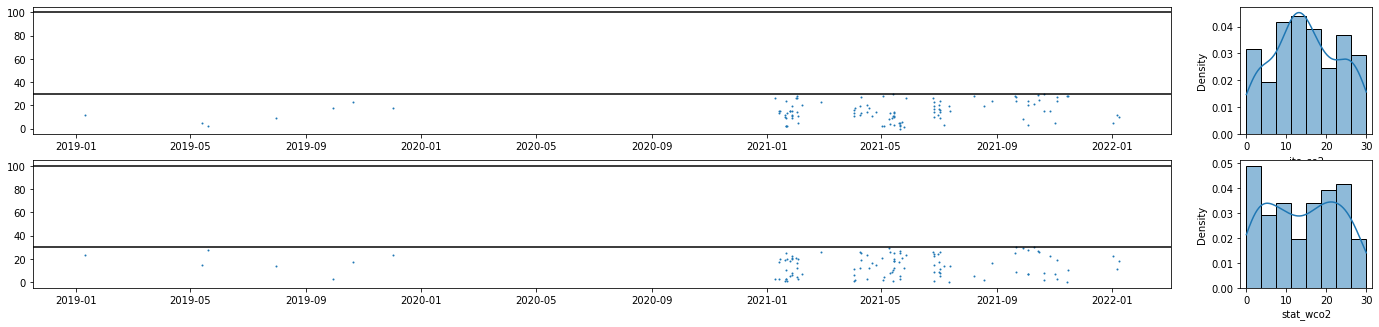

In [9]:
figprops = dict(figsize=(24, 8), dpi=72)
fig = plt.figure(**figprops)
fig_grid = plt.GridSpec(3,100)

#cond = fluxResult.qc_co2_flux == 0
cond = fluxResult.overall_flag == 0

plt.subplot(fig_grid[0, :85])
plt.scatter(fluxResult.TIMESTAMP[cond], fluxResult.itc_co2[cond], s=1)
plt.axhline(30, c='k')
plt.axhline(100, c='k')

plt.subplot(fig_grid[0, 90:])
sns.histplot(x=fluxResult.itc_co2[cond], kde=True, stat='density')

plt.subplot(fig_grid[1, :85])
plt.scatter(fluxResult.TIMESTAMP[cond], fluxResult.stat_wco2[cond], s=1)
plt.axhline(30, c='k')
plt.axhline(100, c='k')

plt.subplot(fig_grid[1, 90:])
sns.histplot(x=fluxResult.stat_wco2[cond], kde=True, stat='density')



In [ ]:
print(np.sum(fluxResult.qc_co2_flux == np.max((fluxResult.fITC, fluxResult.fSTA), axis=0)) / len(fluxResult))

cond = fluxResult.qc_co2_flux == 0
print(np.sum((fluxResult.qc_co2_flux == fluxResult.overall_flag)[cond]) / len(fluxResult[cond]))
print(len(fluxResult[cond]), len(fluxResult[fluxResult.overall_flag==0]), len(fluxResult[fluxResult.fITC==0]), len(fluxResult[fluxResult.fSTA==0]))

cond = fluxResult.qc_co2_flux == 1
print(np.sum((fluxResult.qc_co2_flux == fluxResult.overall_flag)[cond]) / len(fluxResult[cond]))
print(len(fluxResult[cond]), len(fluxResult[fluxResult.overall_flag==1]), len(fluxResult[fluxResult.fITC==1]), len(fluxResult[fluxResult.fSTA==1]))

cond = fluxResult.qc_co2_flux == 2
print(np.sum((fluxResult.qc_co2_flux == fluxResult.overall_flag)[cond]) / len(fluxResult[cond]))
print(len(fluxResult[cond]), len(fluxResult[fluxResult.overall_flag==2]), len(fluxResult[fluxResult.fITC==2]), len(fluxResult[fluxResult.fSTA==2]))

GAP FILLING

In [4]:
menu["gap_filling"].update({'output_path': 'C:/Users/phherigcoimb/Desktop/INRAE_longfiles/ICOS/FR-Fon/output/FR-Fon_full_output_flagged_gapfilled.30mn.csv',
 'path': 'C:/Users/phherigcoimb/Desktop/INRAE_longfiles/ICOS/FR-Fon/output/FR-Fon_full_output_flagged.30mn.csv'})
menu["gap_filling"]

{'cols': {'CWT': {'flag': ['fITC'], 'var': 'cwt_co2w'},
  'DWT': {'flag': ['fITC'],
   'flux': ['dwt_wco2++h2o',
    'dwt_wco2+-h2o',
    'dwt_wco2-+h2o',
    'dwt_wco2--h2o'],
   'var': 'dwt_wco2_x'},
  'EC': {'flag': ['fITC', 'fSTA'], 'var': 'cov_wco2'},
  'EP': {'flag': ['fITC', 'fSTA'], 'var': 'co2_flux'}},
 'latitude': '48.84422',
 'longitude': '1.95191',
 'output_path': 'C:/Users/phherigcoimb/Desktop/INRAE_longfiles/ICOS/FR-Fon/output/FR-Fon_full_output_flagged_gapfilled.30mn.csv',
 'path': 'C:/Users/phherigcoimb/Desktop/INRAE_longfiles/ICOS/FR-Fon/output/FR-Fon_full_output_flagged.30mn.csv'}

In [2]:
menu["gap_filling"]['cols'] = {'CWT': {'flag': ['fITC'], 'var': 'cwt_co2w'},
  'DWT': {'flag': ['fITC'], 'var': 'dwt_co2w'},
  'EC': {'flag': ['fITC', 'fSTA'], 'var': 'cov_wco2'},
  'EP': {'flag': ['fITC', 'fSTA'], 'var': 'co2_flux'}}
menu["gap_filling"]

{'cols': {'CWT': {'flag': ['fITC'], 'var': 'cwt_co2w'},
  'DWT': {'flag': ['fITC'], 'var': 'dwt_co2w'},
  'EC': {'flag': ['fITC', 'fSTA'], 'var': 'cov_wco2'},
  'EP': {'flag': ['fITC', 'fSTA'], 'var': 'co2_flux'}},
 'latitude': '48.84422',
 'longitude': '1.95191',
 'output_path': 'C:/Users/phherigcoimb/Desktop/INRAE_longfiles/ICOS/FR-Gri/output/FR-Gri_full_output_flagged_gapfilled.30mn.csv',
 'path': 'C:/Users/phherigcoimb/Desktop/INRAE_longfiles/ICOS/FR-Gri/output/FR-Gri_full_output_flagged.30mn.csv'}

In [7]:
import importlib
importlib.reload(of)

<module 'Lib.open_flux.main' from 'c:\\Users\\phherigcoimb\\OneDrive\\INRAe\\thesis-project-1\\gargantua\\Lib\\open_flux\\main.py'>

In [8]:
_ = of.gap_filling(**menu["gap_filling"])


cwt_co2w


# End